## DESI Classifier Performance: BAL QSOs
#### Plot to show performance at identifying QSOs with BAL features
xxx

In [2]:
import copy
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from quasarnet.io import read_truth
from qn_analysis import plot, strategy, utils, variables

In [3]:
qnet_path = '/global/homes/j/jfarr/Projects/QuasarNET/'
figsize = (12,8)
fontsize = 18

temp_output_loc = '/global/homes/j/jfarr/Projects/QuasarNET_DESI/'

plt.rc('font', size=fontsize)

### Load the results from the different classifiers

In [4]:
## General parameters
selections = ['SV0_QSO','MINI_SV_QSO']

## RR parameters

## QN parameters
n_detect = 1
c_th = 0.8
include_c_qn = True
include_cbal_qn = True

## SQ parameters
p_min = 0.47
include_p_sq = True

In [5]:
f_truth = qnet_path+'/data/MiniSV/SV0/SV0_truth_tile68002_night20200315.fits'
truth = read_truth([f_truth])

In [6]:
data = {}

## Load the RR data.
f_rr = temp_output_loc+'/rr_results/rr_SV0_68002_20200315.fits'
data['RR'] = utils.load_rr_data(f_rr,mode='DESI')

## Load the QN data.
f_qn = temp_output_loc+'/qn_results/qn_SV0_68002_20200315.fits'
data['QN'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn,include_cbal=include_cbal_qn,mode='DESI')

### Find the set of common spectra, and reduce all data to that set
This finds which spectra* are common to all datasets, and removes any that are not common. It then matches the data from each classifier to each spectrum, and produces a single data table.

\* using spec_id = plate$\times$1000000000 + mjd$\times$10000 + fiber for BOSS, or spec_id = targetid for DESI (to be updated)

In [7]:
data_table = utils.reduce_data_to_table(data,truth,
                                  include_c_qn=include_c_qn,
                                  include_cbal_qn=include_cbal_qn,
                                  include_p_sq=include_p_sq)
data_table[:5]

SPEC_ID,OBJ_ID,ZCONF_PERSON,Z_VI,CLASS_VI,ISQSO_VI,Z_RR,CLASS_RR,ISQSO_RR,ZWARN_RR,Z_QN,CLASS_QN,ISQSO_QN,C_QN [6],CBAL_QN
int64,int64,int64,float64,str8,bool,float64,str8,bool,int64,float64,str8,bool,float64,float64
35185923935178324,35185923935178324,2,1.998,QSO,True,2.001,QSO,True,0,2.002,QSO,True,1.000 .. 0.000,1.000
35185923939370065,35185923939370065,2,-0.000,STAR,False,-0.000,STAR,False,0,2.657,NONQSO,False,0.000 .. 0.000,0.000
35185923939371431,35185923939371431,2,2.134,QSO,True,2.134,QSO,True,0,2.153,QSO,True,1.000 .. 0.000,0.000
35185923939372655,35185923939372655,2,1.507,GALAXY,False,1.507,GALAXY,False,0,1.967,NONQSO,False,0.000 .. 0.000,0.000
35185923939373842,35185923939373842,1,0.000,STAR,False,-0.000,STAR,False,4,1.841,NONQSO,False,0.000 .. 0.000,0.000


In [8]:
# Include only objects in the data table that have the highest confidence level, and VI redshift not equal to -1.
w = (data_table['ZCONF_PERSON']==2) & (data_table['Z_VI']>-1)
data_table = data_table[w]
len(data_table)

696

### Evaluate performance of classifiers at selecting QSOs with BAL features.
xxx

In [9]:
data_table_archive = copy.deepcopy(data_table)

#### See what is found by QN.

In [10]:
cbal_th = 0.5
isbal_qn = (data_table['CBAL_QN']>cbal_th)

In [11]:
print('QN finds {} BALs according to BAL_PROB>{}.'.format(isbal_qn.sum(),cbal_th))

QN finds 35 BALs according to BAL_PROB>0.5.


#### See which objects are found by BAL finder

In [12]:
from astropy.io import fits
from astropy.table import Table
bal_data = fits.open('/global/homes/j/jfarr/Projects/QuasarNET_DESI/balfinder_results/balfinder_SV0_68002_20200315.fits')
bal_data_table = Table(bal_data[1].data)
print(len(bal_data_table))
bal_data_table[:5]

441


TARGETID,TARGET_RA,TARGET_DEC,Z,ZERR,ZWARN,PCA_COEFFS [5],PCA_CHI2,BAL_PROB,BI_CIV,ERR_BI_CIV,NCIV_2000,VMIN_CIV_2000 [5],VMAX_CIV_2000 [5],POSMIN_CIV_2000 [5],FMIN_CIV_2000 [5],AI_CIV,ERR_AI_CIV,NCIV_450,VMIN_CIV_450 [17],VMAX_CIV_450 [17],POSMIN_CIV_450 [17],FMIN_CIV_450 [17],BI_SIIV,ERR_BI_SIIV,NSIIV_2000,VMIN_SIIV_2000 [5],VMAX_SIIV_2000 [5],POSMIN_SIIV_2000 [5],FMIN_SIIV_2000 [5],AI_SIIV,ERR_AI_SIIV,NSIIV_450,VMIN_SIIV_450 [17],VMAX_SIIV_450 [17],POSMIN_SIIV_450 [17],FMIN_SIIV_450 [17]
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32
35185941920350460,200.71733,7.389993,1.8865774,0.00018747688,0.0,50.01192 .. -2.4200065,1.314995,0.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,687.1845,18.479765,3,17278.844 .. -1.0,17815.229 .. -1.0,17761.59 .. -1.0,-0.047162425 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0
35185941920351213,200.84016,7.438364,3.1780255,0.00028696412,0.0,25.421469 .. 0.301946,1.3252279,0.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,80.87148,7.758924,3,22446.428 .. -1.0,22965.246 .. -1.0,22742.896 .. -1.0,-0.22864194 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0
35185941920351477,200.7996,7.455114,1.9473405,0.00018505206,0.0,29.595219 .. 0.32942116,1.2865039,0.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0
35185941920352479,200.80397,7.5122623,2.3024974,0.00038030322,0.0,14.54834 .. 0.24404895,1.2991899,0.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0
35185941920352484,200.88284,7.513208,3.806303,0.00023492187,0.0,15.568284 .. 0.95778686,1.5597934,0.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0


In [13]:
bal_prob_th = 0.5
isbal_bf = (bal_data_table['BAL_PROB']>bal_prob_th)
isbal_bf_bi = (bal_data_table['BI_CIV']>0)
isbal_bf_ai = (bal_data_table['AI_CIV']>0)

In [14]:
print('BAL finder finds {} BALs according to BAL_PROB>{}.'.format(isbal_bf.sum(),bal_prob_th))
print('BAL finder finds {} BALs according to BI>0.'.format(isbal_bf_bi.sum()))
print('BAL finder finds {} BALs according to AI>0.'.format(isbal_bf_ai.sum()))

BAL finder finds 0 BALs according to BAL_PROB>0.5.
BAL finder finds 7 BALs according to BI>0.
BAL finder finds 42 BALs according to AI>0.


#### See what we can find from the comments in VI.

In [15]:
import pandas as pd
f_vi = '/global/cfs/cdirs/desi/sv/vi/TruthTables/truth_table_QSO_v1.2.csv'
vi = pd.read_csv(f_vi, header=0)
vi[:5]

,TARGETID,Redrock z,best z,best quality,Redrock spectype,best spectype,all VI issues,all VI comments,merger comment,N_VI,...,FIBER,FLUX_G,FLUX_R,FLUX_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z
0,35185929937227607,1.4995,1.49950,1.0,GALAXY,GALAXY,--,Poor noise subtraction Maybe OII correct but...,None,5,...,696,0.728820,0.730633,1.221301,0.566604,0.568014,0.949472,0.916734,0.943119,0.967773
1,35185929937228335,0.4102,0.41020,3.6,GALAXY,GALAXY,--,--,none,5,...,657,0.228894,0.745470,1.842765,0.178230,0.580468,1.434888,0.916849,0.943198,0.967819
2,35185929937229340,1.4944,1.49440,4.0,QSO,QSO,--,--,none,5,...,652,2.102620,4.026039,6.276346,1.635143,3.130926,4.880920,0.917295,0.943508,0.967997
3,35185929941418536,1.0804,1.08032,3.8,GALAXY,GALAXY,--,Both galaxy and QSO in spectrum,none,5,...,194,1.567732,2.329047,4.268086,1.221243,1.814298,3.324784,0.917957,0.943966,0.968260
4,35185929941418791,0.0002,0.00020,3.0,STAR,STAR,--,Large noise,None,5,...,228,0.839756,2.391115,4.388883,0.654225,1.862836,3.419229,0.918313,0.944213,0.968401


In [16]:
isbal_vi = [('bal' in comment.lower())|('broad absorption' in comment.lower()) for comment in vi['all VI comments']]&(vi['best spectype']=='QSO')
isbal_vi = np.array(isbal_vi.array)

In [17]:
print('VI finds {} BALs by looking for "bal" and "broad absorption" in comments of QSOs.'.format(isbal_vi.sum()))

VI finds 20 BALs by looking for "bal" and "broad absorption" in comments of QSOs.


#### For spectra that the BAL finder found to have AI/BI>0, or were flagged by VI, do QN and RR perform well?

In [18]:
filters = {}
filters['AI'] = np.zeros(len(data_table)).astype(bool)
filters['BI'] = np.zeros(len(data_table)).astype(bool)
filters['VI'] = np.zeros(len(data_table)).astype(bool)
for i,spec_id in enumerate(data_table['SPEC_ID']):
    w = np.in1d(bal_data_table['TARGETID'],spec_id)
    filters['AI'][i] = isbal_bf_ai[w]
    filters['BI'][i] = isbal_bf_bi[w]
    w = np.in1d(vi['TARGETID'],spec_id)
    filters['VI'][i] = isbal_vi[w]

/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


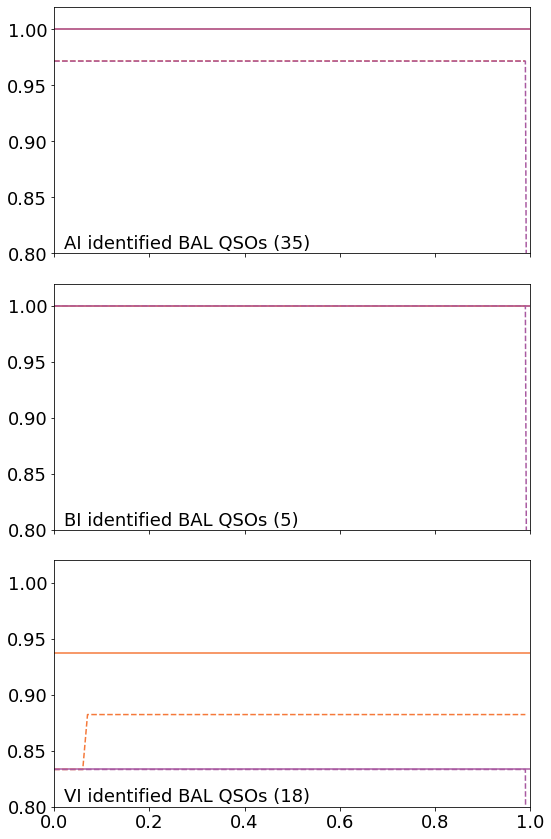

In [23]:
fig, axs = plt.subplots(3,1,figsize=(8,12),squeeze=False,sharex=True)
c_th_values = np.linspace(0,1,101)
dv_max = 6000.
n_detect=1

for i,q in enumerate(['AI','BI','VI']):
    
    temp_data_table = copy.deepcopy(data_table[filters[q]])
    isqso_truth, isgal_truth, isstar_truth, isbad = plot.get_truths(temp_data_table)
    z_truth = temp_data_table['Z_VI']
    
    isqso_rr = temp_data_table['ISQSO_RR']&(temp_data_table['ZWARN_RR']==0)
    z_rr = temp_data_table['Z_RR']
    p_rr,c_rr = plot.get_pur_com(isqso_rr,z_rr,isqso_truth,isgal_truth,isbad,z_truth,dv_max=dv_max)
    axs[i,0].axhline(y=p_rr,c=utils.colours['C0'],ls='-')
    axs[i,0].axhline(y=c_rr,c=utils.colours['C1'],ls='-')
    
    p_qn = []
    c_qn = []
    for c_th in c_th_values:
        isqso_qn = ((temp_data_table['C_QN']>c_th).sum(axis=1))>=n_detect
        z_qn = temp_data_table['Z_QN']
        p,c = plot.get_pur_com(isqso_qn,z_qn,isqso_truth,isgal_truth,isbad,z_truth,dv_max=dv_max)
        p_qn += [p]
        c_qn += [c]
    axs[i,0].plot(c_th_values,p_qn,c=utils.colours['C0'],ls='--')
    axs[i,0].plot(c_th_values,c_qn,c=utils.colours['C1'],ls='--')    
    
    axs[i,0].text(0.02,0.02,'{} identified BAL QSOs ({})'.format(q,filters[q].sum()),transform=axs[i,0].transAxes)
    axs[i,0].set_ylim(0.8,1.02)
    axs[i,0].set_xlim(0.,1.)
    
plt.tight_layout()
plt.show()

#### Look at the VI-identified BALs missed by QN

In [37]:
q = 'VI'
temp_data_table = copy.deepcopy(data_table[filters[q]])
isqso_truth, isgal_truth, isstar_truth, isbad = plot.get_truths(temp_data_table)
z_truth = temp_data_table['Z_VI']
    
c_th = 0.5
n_detect = 1
isqso_qn = ((temp_data_table['C_QN']>c_th).sum(axis=1))>=n_detect
z_qn = temp_data_table['Z_QN']

zgood = strategy.get_dv(z_qn,z_truth,z_truth)<=dv_max
missed_specids = temp_data_table['SPEC_ID'][(~(isqso_qn&zgood))]

w = np.in1d(data_table['SPEC_ID'],missed_specids)
data_table[w]

SPEC_ID,OBJ_ID,ZCONF_PERSON,Z_VI,CLASS_VI,ISQSO_VI,Z_RR,CLASS_RR,ISQSO_RR,ZWARN_RR,Z_QN,CLASS_QN,ISQSO_QN,C_QN [6],CBAL_QN
int64,int64,int64,float64,str8,bool,float64,str8,bool,int64,float64,str8,bool,float64,float64
35185947951763330,35185947951763330,2,2.635,QSO,True,2.651,QSO,True,0,2.708,QSO,True,1.000 .. 0.000,0.951
35185953941229053,35185953941229053,2,0.983,QSO,True,0.983,QSO,True,0,1.023,QSO,True,0.000 .. 0.000,0.000
35185983804672382,35185983804672382,2,1.802,QSO,True,0.454,GALAXY,False,0,0.563,NONQSO,False,0.000 .. 0.000,0.000


#### Look at the VI-identified BALs missed by RR

In [39]:
q = 'VI'
temp_data_table = copy.deepcopy(data_table[filters[q]])
isqso_truth, isgal_truth, isstar_truth, isbad = plot.get_truths(temp_data_table)
z_truth = temp_data_table['Z_VI']
    
isqso_rr = temp_data_table['ISQSO_RR']&(temp_data_table['ZWARN_RR']==0)
z_rr = temp_data_table['Z_RR']

zgood = strategy.get_dv(z_rr,z_truth,z_truth)<=dv_max
missed_specids = temp_data_table['SPEC_ID'][(~(isqso_rr&zgood))]

w = np.in1d(data_table['SPEC_ID'],missed_specids)
data_table[w]

SPEC_ID,OBJ_ID,ZCONF_PERSON,Z_VI,CLASS_VI,ISQSO_VI,Z_RR,CLASS_RR,ISQSO_RR,ZWARN_RR,Z_QN,CLASS_QN,ISQSO_QN,C_QN [6],CBAL_QN
int64,int64,int64,float64,str8,bool,float64,str8,bool,int64,float64,str8,bool,float64,float64
35185929933034185,35185929933034185,2,2.190,QSO,True,2.196,QSO,True,4,2.237,QSO,True,0.978 .. 0.000,1.000
35185929945614311,35185929945614311,2,3.623,QSO,True,0.073,QSO,True,0,3.690,QSO,True,1.000 .. 0.000,0.988
35185983804672382,35185983804672382,2,1.802,QSO,True,0.454,GALAXY,False,0,0.563,NONQSO,False,0.000 .. 0.000,0.000
